In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
def one_step_lookahead(s, V, rewards):
  """
  Helper function to calculate the value for all action in a given state.

  Args:
    s: The gambler’s capital. Integer.
    V: The vector that contains values at each state.
    p_h: The probability of gambler winning the bet.
    rewards: The reward vector.

    Returns:
    A vector containing the expected value of each action.
    Its length equals to the number of actions.
  """
  p_h= 0.25
  A = np.zeros(101)
  stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
  for a in stakes:
    # rewards[s+a], rewards[s-a] are immediate rewards.
    # V[s+a], V[s-a] are values of the next states.
    # This is the core of the Bellman equation: The expected value of your action is
    # the sum of immediate rewards and the value of the next state.
    A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
  return A

In [ ]:
# The reward is zero on all transitions except those on which the gambler reaches his goal,
# when it is +1.
rewards = np.zeros(101)
rewards[100] = 1
# We introduce two dummy states corresponding to termination with capital of 0 and 100
V = np.zeros(101)
discount_factor = 1
theta = 0.0001
while True:
  # Stopping condition
  delta = 0
  # Update each state...
  for s in range(1, 100):
    # Do a one-step lookahead to find the best action
    A = one_step_lookahead(s, V, rewards)
    # print(s,A,V) # if you want to debug.
    best_action_value = np.max(A)
    # Calculate delta across all states seen so far
    delta = max(delta, np.abs(best_action_value - V[s]))
    # Update the value function. Ref: Sutton book eq. 4.10.
    V[s] = best_action_value
    # Check if we can stop
  if delta < theta:
    break

# Create a deterministic policy using the optimal value function
policy = np.zeros(100)
for s in range(1, 100):
  # One step lookahead to find the best action for this state
  A = one_step_lookahead(s, V, rewards)
  best_action = np.argmax(A)
  # Always take the best action
  policy[s] = best_action

In [ ]:
print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(V)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.  9.  8.
 18. 19. 20.  4. 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40.  9. 42. 43. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 10.  9. 17. 18. 19.  5. 21.
 22.  2.  1. 25.  1.  2.  3. 21.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.00000000e+00 7.28611683e-05 2.91444673e-04 6.95264571e-04
 1.16577869e-03 1.77125506e-03 2.78105828e-03 4.03661211e-03
 4.66311477e-03 5.60141644e-03 7.08502024e-03 9.04088770e-03
 1.11242331e-02 1.56796459e-02 1.61464484e-02 1.69534413e-02
 1.86524591e-02 1.98260623e-02 2.24056658e-02 2.73847344e-02
 2.83400810e-02 3.04945467e-02 3.61635508e-02 3.84959101e-02
 4.44969325e-02 6.25000000e-02 6.27185835e-02 6.33743340e-02
 6.45857937e-02 6.59973361e-02 6.78137652e-02 7.08431749e-02
 7.46098363e-02 7.64893443e-02 7.93042493e-02 8.37550607e-02

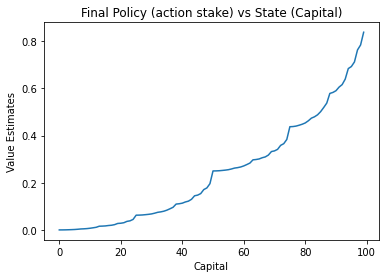

In [ ]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = V[:100]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')

# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')

# function to show the plot
plt.show()

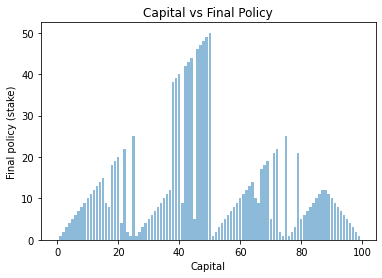

In [ ]:

# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy

# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)

# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')

# giving a title to the graph
plt.title('Capital vs Final Policy')

# function to show the plot
plt.show()